In [ ]:
!pip install torchaudio

     |████████████████████████████████| 1.9MB 8.1MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import csv
import pandas as pd
import numpy as np
import librosa
import os,sys
import torchaudio

In [ ]:
ROOT_PATH='./drive/MyDrive/ASR_Project_Shared/'

## Creating a softlink to drive root, easy for relative addressing


nb_path = './final_data'
os.symlink(ROOT_PATH+'final_data', nb_path)
sys.path.insert(0, nb_path) 

nb_path = './metadata_marathi_plus_noise.csv'
os.symlink(ROOT_PATH+'metadata_marathi_plus_noise.csv', nb_path)
sys.path.insert(0, nb_path) 

In [ ]:
## Here Entire data is to be used for Test set (I guess) ##
# train_frac = 0.8

data = pd.read_csv('metadata_marathi_plus_noise.csv')
data = data.reindex(np.random.permutation(data.index)) ##This just randomly shuffles the rows

# msk = np.random.rand(len(data)) < train_frac
# train_data = data[msk]
# test_data = data[~msk]

In [ ]:
data

,file_path,label
1070,./final_data/noise/HOME-KITCHEN-1_trim_5s_61.wav,0
526,./final_data/marathi/127778_1.wav,1
455,./final_data/marathi/128123_1.wav,1
102,./final_data/marathi/127590_1.wav,1
866,./final_data/noise/STREET-CITY-2_trim_5s_8.wav,0
...,...,...
706,./final_data/marathi/126877_2.wav,1
106,./final_data/marathi/127827_2.wav,1
1134,./final_data/noise/HOME-KITCHEN-1_trim_5s_125.wav,0
1063,./final_data/noise/HOME-KITCHEN-1_trim_5s_54.wav,0


In [ ]:
class SpeechNoiseDataset(Dataset):
    
    def __init__(self, dataframe):
        self.data = dataframe
        self.sample_rate = 16000

        n_fft = 2048
        win_length = None
        hop_length = 512
        n_mels = 256
        n_mfcc = 40

        self.mfcc_transform = torchaudio.transforms.MFCC(
            sample_rate=self.sample_rate,
            n_mfcc=n_mfcc, 
            melkwargs={'n_fft': n_fft, 'n_mels': n_mels, 'hop_length': hop_length})

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        data_i = self.data.iloc[idx]
        f_path = data_i.file_path
        label = data_i.label

        #### Uncomment the following if you want features using librosa ####

        # audio, sample_rate = librosa.load(f_path, res_type='kaiser_fast') 
        # mfccs = librosa.feature.mfcc(y=audio, sr=self.sample_rate, n_mfcc=40)
        # mfccsscaled = np.mean(mfccs.T,axis=0)


        #### Features using torchaudio ####

        audio, sample_rate = torchaudio.load(f_path)
        mfcc_feats = self.mfcc_transform(audio).squeeze(0)
        mfccsscaled = torch.mean(mfcc_feats.T, dim=0)
        
        return mfccsscaled, label


In [ ]:
batch_size = 8
# train_dataset = SpeechNoiseDataset(train_data)
# train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# test_dataset = SpeechNoiseDataset(test_data)
# test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

test_dataset = SpeechNoiseDataset(data)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
test_dataloader

In [ ]:
for features, labels in test_dataloader:
  break

print(features.shape)
print(labels.shape)

torch.Size([8, 40])
torch.Size([8])


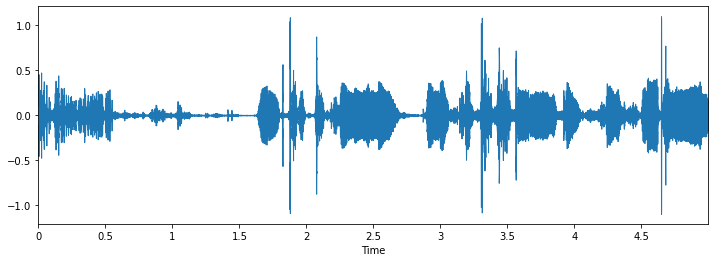

In [ ]:
# Class: Engine Idling 

import matplotlib.pyplot as plt
import librosa.display
filename = 'final_data/marathi/126842_1.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
#ipd.Audio(filename)

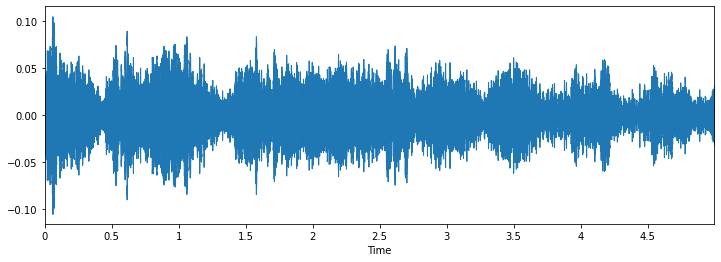

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
filename = 'final_data/noise/HOME-LIVINGB-2_trim_5s_142.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)